In [1]:
import numpy as np
import pandas as pd
import h5py
import pysam
import os
from modisco.visualization import viz_sequence
from modisco import util
from matplotlib import pyplot as plt
import pybedtools

pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

In [2]:
dttype = 'dnase'
mode = 'counts'

#modisco_path = '/oak/stanford/groups/akundaje/projects/chrombpnet_paper_new/DNASE_PE/HEPG2/HEPG2_06.08.2022_bias_128_4_1234_0.8_fold_0/SIGNAL/modisco_crop_500/modisco_results_allChroms_'+mode+'.hdf5'
#ppm_dir ='/mnt/lab_data3/anusri/chrombpnet/results/chrombpnet/DNASE_PE/HEPG2/HEPG2_06.08.2022_bias_128_4_1234_0.8_fold_0/06_22_2022_motif_scanning/ppms/'
#tomtom = pd.read_csv("/oak/stanford/groups/akundaje/projects/chrombpnet_paper_new/DNASE_PE/HEPG2/HEPG2_06.08.2022_bias_128_4_1234_0.8_fold_0/SIGNAL/modisco_crop_500/" + mode + ".tomtom.tsv", sep="\t")

#modisco_path = '/oak/stanford/groups/akundaje/projects/chrombpnet_paper_new/ATAC_PE/HEPG2/HEPG2_05.09.2022_bias_128_4_1234_0.8_fold_0/SIGNAL/modisco_crop_500/modisco_results_allChroms_'+mode+'.hdf5'
#ppm_dir = '/mnt/lab_data3/anusri/chrombpnet/results/chrombpnet/ATAC_PE/HEPG2/HEPG2_05.09.2022_bias_128_4_1234_0.8_fold_0/06_22_2022_motif_scanning/ppms/'
#tomtom = pd.read_csv("/oak/stanford/groups/akundaje/projects/chrombpnet_paper_new/ATAC_PE/HEPG2/HEPG2_05.09.2022_bias_128_4_1234_0.8_fold_0/SIGNAL/modisco_crop_500/" + mode + ".tomtom.tsv", sep="\t")

#modisco_path = '/oak/stanford/groups/akundaje/projects/chrombpnet_paper_new/ATAC_PE/GM12878/GM12878_03.01.2022_bias_128_4_1234_0.4_fold_0/SIGNAL/modisco/modisco_results_allChroms_'+mode+'.hdf5'
#ppm_dir = '/mnt/lab_data3/anusri/chrombpnet/results/chrombpnet/ATAC_PE/GM12878/GM12878_03.01.2022_bias_128_4_1234_0.4_fold_0/06_22_2022_motif_scanning/ppms/'
#tomtom = pd.read_csv("/oak/stanford/groups/akundaje/projects/chrombpnet_paper_new/ATAC_PE/GM12878/GM12878_03.01.2022_bias_128_4_1234_0.4_fold_0/SIGNAL/modisco/" + mode + ".tomtom.tsv", sep="\t")

modisco_path = '/oak/stanford/groups/akundaje/projects/chrombpnet_paper_new/ATAC_PE/K562/K562_02.17.2022_bias_128_4_1234_0.5_fold_0/SIGNAL/modisco/modisco_results_allChroms_'+mode+'.hdf5'
ppm_dir = '/mnt/lab_data3/anusri/chrombpnet/results/chrombpnet/ATAC_PE/K562/K562_02.17.2022_bias_128_4_1234_0.5_fold_0/06_22_2022_motif_scanning/ppms/'
tomtom = pd.read_csv("/oak/stanford/groups/akundaje/projects/chrombpnet_paper_new/ATAC_PE/K562/K562_02.17.2022_bias_128_4_1234_0.5_fold_0/SIGNAL/modisco/" + mode + ".tomtom.tsv", sep="\t")


ppm
background=[0.25, 0.25, 0.25, 0.25]

In [3]:
tomtom.head()

,Pattern,Num_Seqlets,Match_1,q-value,Match_2,q-value.1,Match_3,q-value.2,Match_4,q-value.3,Match_5,q-value.4,Match_6,q-value.5,Match_7,q-value.6,Match_8,q-value.7,Match_9,q-value.8,Match_10,q-value.9
0,metacluster_0.pattern_0,7697,GATA3_GATA_1,8.802120e-02,GATA3_GATA_2,8.802120e-02,GATA3_HUMAN.H11MO.0.A,8.802120e-02,Mecom_MA0029.1,8.802120e-02,EVI1_HUMAN.H11MO.0.B,8.802120e-02,EVI1_MOUSE.H11MO.0.B,8.802120e-02,GATA1+TAL1_MA0140.2,8.802120e-02,GATA1_HUMAN.H11MO.0.A,8.802120e-02,GATA1_MOUSE.H11MO.0.A,8.802120e-02,GATA2_HUMAN.H11MO.0.A,0.088021
1,metacluster_0.pattern_1,5652,CTCF_MA0139.1,1.122670e-14,CTCF_HUMAN.H11MO.0.A,5.765620e-12,CTCF_MOUSE.H11MO.0.A,5.765620e-12,CTCFL_HUMAN.H11MO.0.A,1.521750e-07,CTCFL_MOUSE.H11MO.0.A,2.709000e-07,CTCF_C2H2_1,1.690250e-06,CTCFL_MA1102.1,1.125320e-05,ZIC2_MOUSE.H11MO.0.C,2.055920e-01,ZIC3_HUMAN.H11MO.0.B,2.055920e-01,ZIC3_MOUSE.H11MO.0.A,0.205592
2,metacluster_0.pattern_2,5644,SP1_HUMAN.H11MO.0.A,4.190170e-09,PATZ1_HUMAN.H11MO.0.C,4.659360e-07,SP2_HUMAN.H11MO.0.A,1.037340e-06,SP2_MOUSE.H11MO.0.B,1.037340e-06,KLF1_HUMAN.H11MO.0.A,4.059330e-06,SP3_HUMAN.H11MO.0.B,4.059330e-06,SP3_MOUSE.H11MO.0.B,4.059330e-06,SP1_MOUSE.H11MO.0.A,5.324400e-06,WT1_HUMAN.H11MO.0.C,2.111850e-05,WT1_MOUSE.H11MO.0.B,0.000021
3,metacluster_0.pattern_3,3098,ELK3_ETS_1,4.240260e-05,ELK3_MA0759.1,4.240260e-05,ELK1_MOUSE.H11MO.0.B,2.644620e-04,EHF_ETS_1,2.644620e-04,EHF_MA0598.2,2.644620e-04,ELF1_ETS_2,2.644620e-04,ETS1_ETS_4,4.533640e-04,ELK1_ETS_1,6.154070e-04,ELK1_ETS_4,6.154070e-04,ELK1_MA0028.2,0.000615
4,metacluster_0.pattern_4,2740,BACH2_MOUSE.H11MO.0.A,6.606030e-07,NFE2_HUMAN.H11MO.0.A,6.606030e-07,NF2L2_MOUSE.H11MO.0.A,6.606030e-07,NFE2_MOUSE.H11MO.0.A,6.606030e-07,NF2L2_HUMAN.H11MO.0.A,6.606030e-07,Bach1+Mafk_MA0591.1,6.606030e-07,MAF+NFE2_MA0501.1,6.606030e-07,Nfe2l2_MA0150.2,6.606030e-07,BACH2_HUMAN.H11MO.0.A,7.645140e-07,BACH1_HUMAN.H11MO.0.A,0.000012


In [4]:
label_dict = {}

for index,row in tomtom.iterrows():
    label_dict[row['Pattern']] = row['Match_1']
        

# Functions

In [5]:
def _plot_weights(array,
                  figsize=(10,3),
                 **kwargs):
    
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111) 
    viz_sequence.plot_weights_given_ax(ax=ax, array=array,**kwargs)
    plt.show()
    plt.close()

# Fetch PPMs

metacluster_0
pattern_0


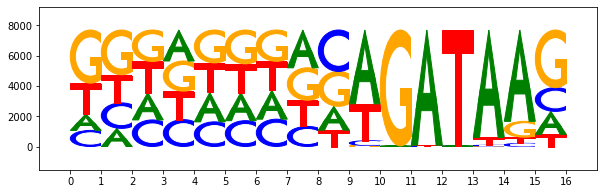

pattern_1


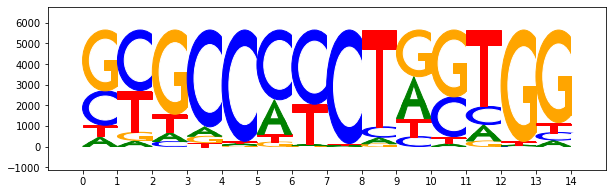

pattern_2


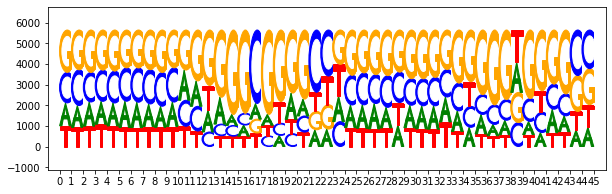

pattern_3


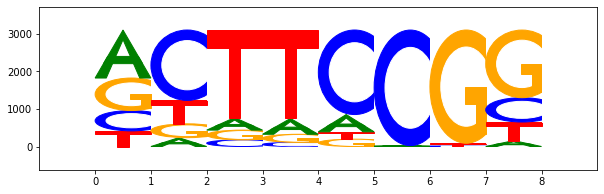

pattern_4


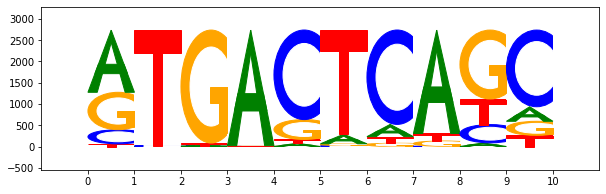

pattern_5


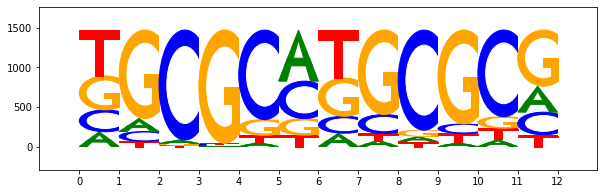

pattern_6


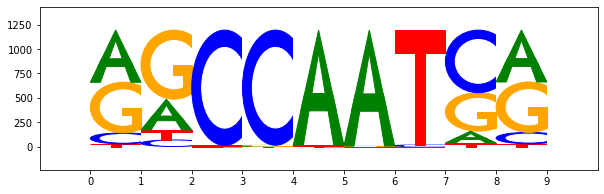

pattern_7


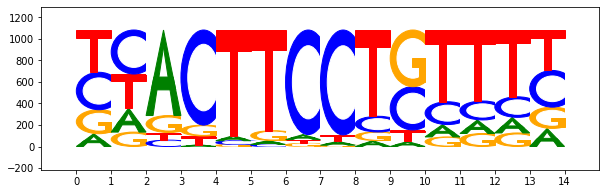

pattern_8


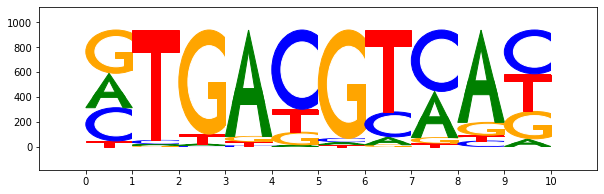

pattern_9


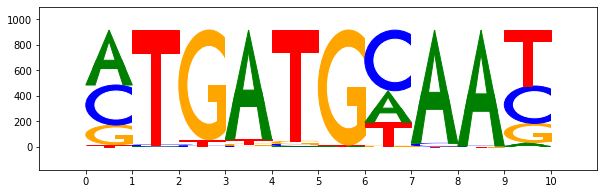

pattern_10


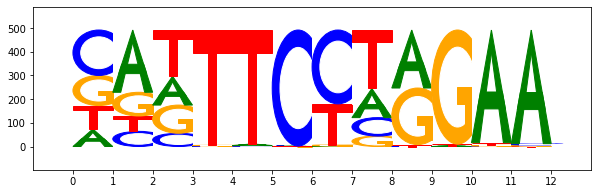

pattern_11


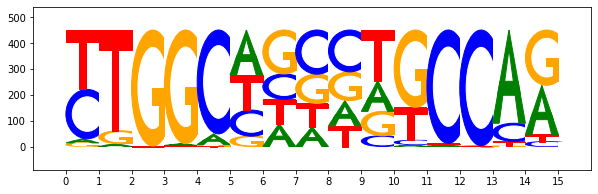

pattern_12


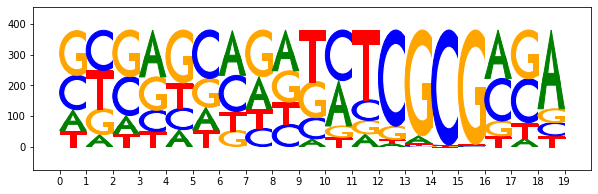

pattern_13


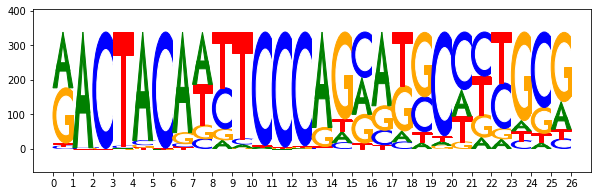

pattern_14


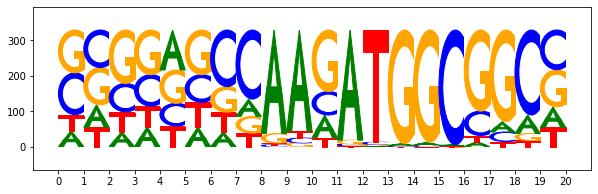

pattern_15


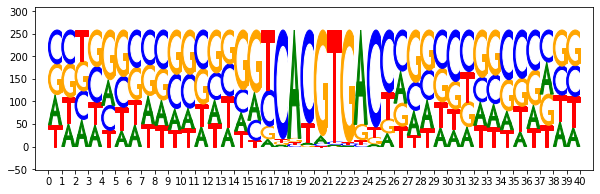

pattern_16


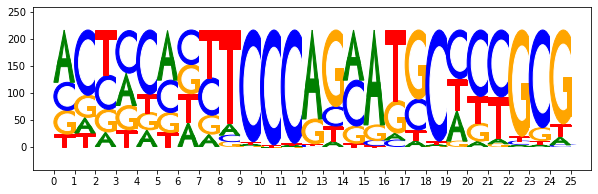

pattern_17


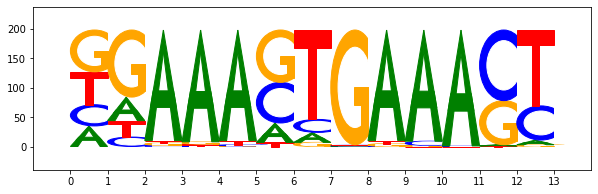

pattern_18


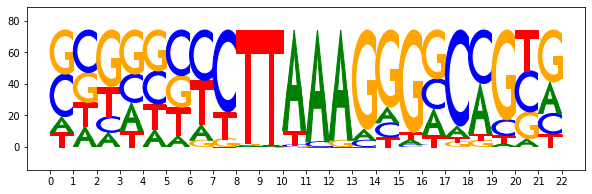

pattern_19


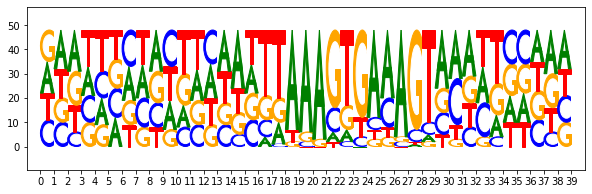

pattern_20


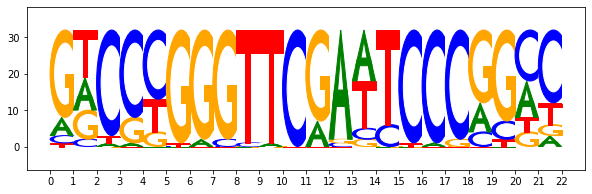

metacluster_1
pattern_0


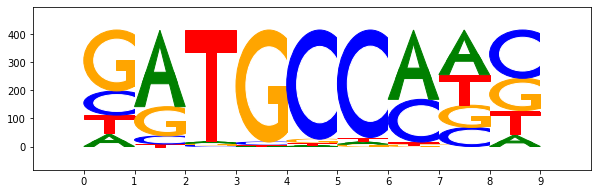

pattern_1


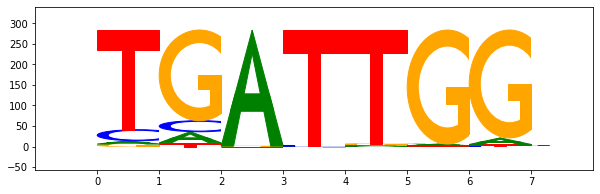

pattern_2


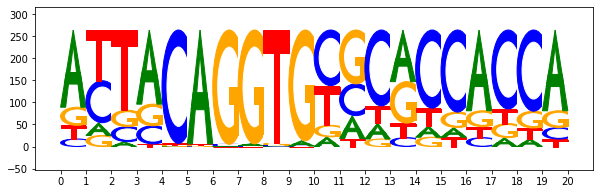

pattern_3


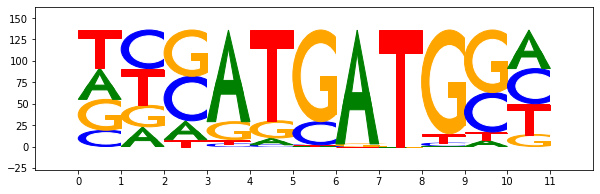

pattern_4


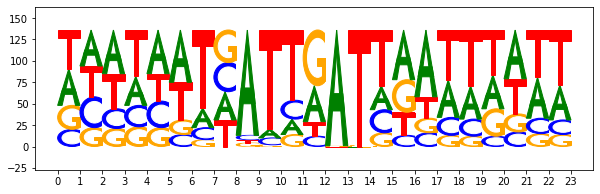

pattern_5


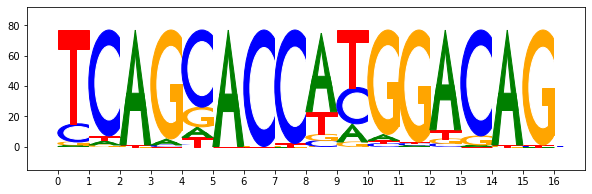

pattern_6


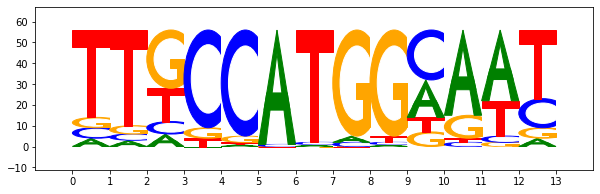

pattern_7


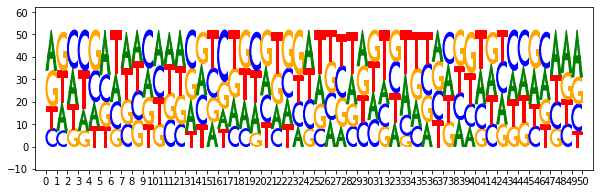

pattern_8


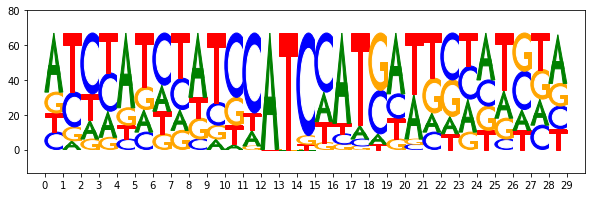

pattern_9


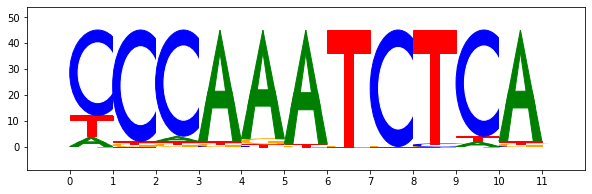

pattern_10


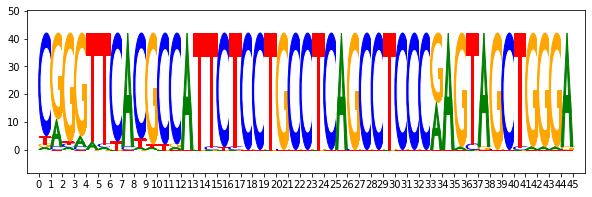

pattern_11


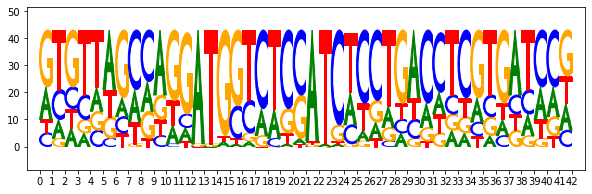

pattern_12


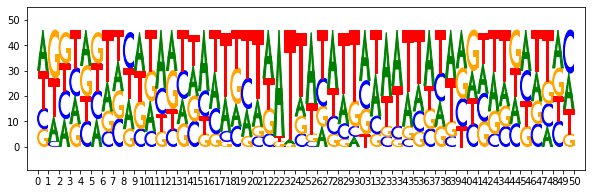

pattern_13


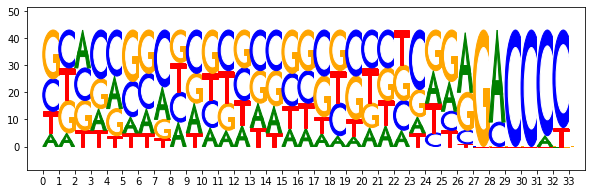

pattern_14


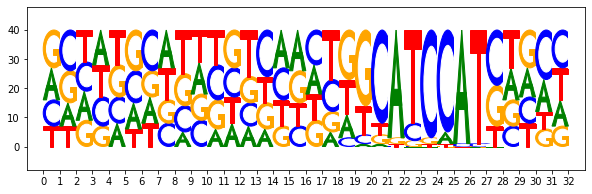

pattern_15


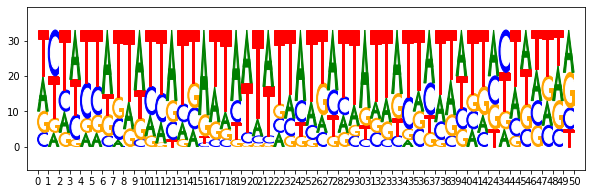

pattern_16


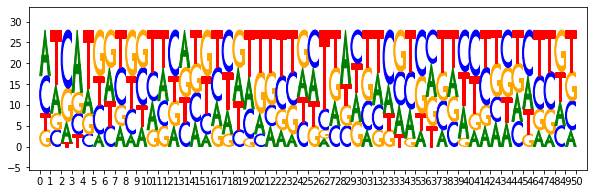

pattern_17


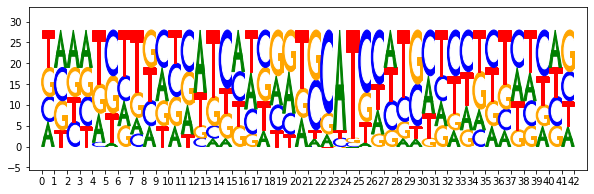

pattern_18


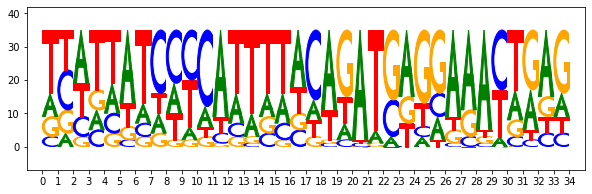

pattern_19


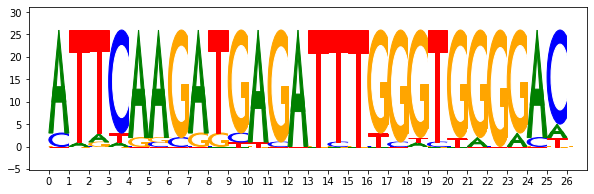

In [6]:
modisco_results = h5py.File(modisco_path, 'r')

for metacluster_name in modisco_results["metacluster_idx_to_submetacluster_results"]:
    print(metacluster_name)

    metacluster = modisco_results["metacluster_idx_to_submetacluster_results"][metacluster_name]
    all_pattern_names = [x.decode("utf-8") for x in list(metacluster["seqlets_to_patterns_result"]["patterns"]["all_pattern_names"][:])]

    for pattern_name in all_pattern_names:
        print(pattern_name)

        ppm = np.array(metacluster['seqlets_to_patterns_result']['patterns'][pattern_name]['sequence']['fwd'])
        cwm = np.array(metacluster['seqlets_to_patterns_result']['patterns'][pattern_name]["task0_contrib_scores"]['fwd'])
        num_seqlets = len(metacluster['seqlets_to_patterns_result']['patterns'][pattern_name]['seqlets_and_alnmts']['seqlets'])

        score = np.sum(np.abs(cwm), axis=1)
        trim_thresh = np.max(score) * 0.25  # Cut off anything less than 30% of max score
        pass_inds = np.where(score >= trim_thresh)[0]
        trimmed = ppm[np.min(pass_inds): np.max(pass_inds) + 1]
        pfm = trimmed * num_seqlets
        pfm = pfm.astype(int)
                
        _plot_weights(pfm.transpose())
    
        #if trimmed.shape[0] < 22 and trimmed.shape[0] > 4:
        
        key_name = str(metacluster_name)+"."+str(pattern_name)
        
        with open(ppm_dir + '/' +  mode +  '.ppms.txt', 'a') as outfile:
            outfile.write('>' + label_dict[key_name] + '\n')

        with open(ppm_dir + '/' +  mode +  '.ppms.txt', 'ab') as outfile:
            np.savetxt(outfile, pfm.transpose(), fmt='%i')
        

